In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.lines import Line2D
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import dateutil

In [2]:
mfg = pd.read_csv(r'..\data\metadata\metabolomics_file_grouping.csv', index_col = 0)
lfg = pd.read_csv(r'..\data\metadata\file_grouping.csv', index_col=0)  # lfg = lipid file grouping
fg = pd.read_csv(r'..\data\metadata\combined_metab_lipid_file_grouping.csv', index_col=0)


animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]
bg_dict = {'diabetic': diabetic, 'impaired': impaired, 'normal': normal}
animal_to_tolerance_dict = {1076: 'diabetic', 1082: 'diabetic',1101: 'diabetic',
                            1060: 'impaired', 1062: 'impaired', 1074: 'impaired',
                            1092: 'impaired', 1102: 'impaired', 1091: 'normal', 1093: 'normal',}

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

In [4]:
data = pd.read_csv(r'..\data\processed\metab_lipid_merged_df.csv', index_col=0).T
data

new_index,m_0,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,...,l_1019,l_1020,l_1021,l_1022,l_1023,l_1024,l_1025,l_1026,l_1027,l_1028
1102_8_RBG,30.624453,29.689560,29.931633,28.978826,24.596731,30.066361,29.242583,29.096030,29.090806,22.659910,...,19.400819,20.144070,20.512869,20.930734,19.535142,18.104875,18.821648,17.878105,16.200014,19.311939
1093_9_RBG,30.644187,29.774822,29.942531,29.128997,26.201371,29.807669,29.301146,29.054638,28.743299,22.576266,...,18.916621,20.310619,19.845454,20.351041,19.313450,18.387917,19.088279,17.974406,15.915763,18.531923
1060_8_FBG,30.560702,29.945500,29.528341,29.839308,17.148994,27.075393,30.003016,28.924166,28.562511,27.506896,...,18.623483,20.648780,20.005141,20.999142,19.774817,20.517490,19.164463,20.603688,19.836798,18.993666
1060_8_RBG,30.610134,29.309067,29.827946,28.459047,17.431244,29.295561,29.113441,28.848762,28.995708,22.512901,...,18.212006,20.310682,19.423127,20.589383,18.430226,17.921098,18.430542,17.488155,16.202162,17.985491
1060_9_FBG,30.606110,30.082627,29.599444,30.235353,19.169210,27.794790,29.908267,28.987014,28.705425,27.900257,...,18.782562,20.389699,19.797970,21.377454,20.184092,20.671826,19.113894,20.788152,20.234283,18.592023
1060_9_RBG,30.996475,29.431175,30.018239,28.625995,26.312933,30.211206,29.212933,29.416956,29.331185,22.829664,...,18.340561,19.661018,19.568500,20.581856,18.948519,18.261890,18.854601,17.718258,16.494586,18.466842
1060_10_FBG,29.787913,30.096643,29.253402,30.252208,27.209158,28.375135,29.968325,29.158594,28.380032,27.560226,...,15.798292,16.197032,17.768934,20.033965,17.930418,19.568571,17.625169,19.769735,19.279616,16.681522
1060_10_RBG,30.636811,29.270487,29.673409,28.265490,25.956118,29.741927,29.297766,28.951930,28.645279,22.775302,...,17.826820,19.299064,19.066750,20.209183,18.440239,17.211559,18.154900,17.016673,15.240250,17.829754
1062_8_FBG,30.572489,30.703658,29.569621,30.641931,21.774699,27.427681,30.349551,28.813080,28.671019,26.901321,...,16.652292,17.166214,17.882779,19.507955,17.567143,19.348489,17.364343,19.240306,18.585339,16.313637
1062_8_RBG,30.636650,30.109212,30.189935,29.492769,26.822243,30.156755,29.559987,29.064005,29.247692,23.578358,...,19.550020,21.079083,20.569204,21.008095,19.595734,18.996482,18.653201,18.778798,16.471090,19.285159


In [11]:
# feature_indexes = {i: int(col) for i, col in enumerate(df.columns)}
# raw_data = df.filter(regex='HILIC_T', axis=0)

groups = fg[['combined_col_name', 'animal', 'week', 'bg_type', 'gluc_tol']]
groups = groups.set_index('combined_col_name')
# display(groups)

raw_data = pd.merge(data, groups, how='inner',
                    left_on=data.index, right_on=groups.index).set_index('key_0')
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA())])  # Scaling is essential for PCA
pca_data = pipeline.fit_transform(raw_data.filter(regex='m_|l_'))  # 2**raw gives the original data, not log2 transformed  ######
# print(pca_data.shape)
# display(pca_data)
pca_object = pipeline.steps[1][1]
columns = ['pc' + str(x) for x in range(1, pca_data.shape[1] + 1)]
# print(columns)
pca_data = pd.DataFrame(pca_data, columns=columns)
# display(pca_data)
pca_data.index = raw_data.index
# display(pca_data)
pca_data = pd.concat([pca_data, raw_data[['animal', 'week', 'bg_type', 'gluc_tol']]], axis=1)
# display(pca_data)

loadings = pd.DataFrame(pca_object.components_.T * np.sqrt(pca_object.explained_variance_))
loadings = loadings.sort_values(0, ascending=False)
# plt.bar(np.arange(loadings.shape[1]), loadings[:, 0])

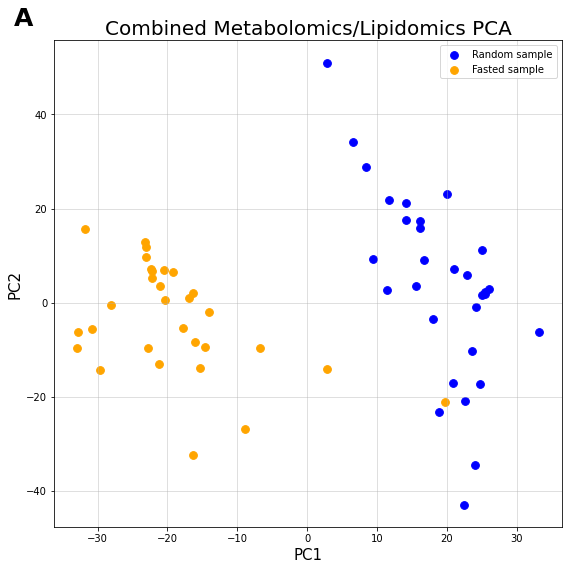

In [12]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('Combined Metabolomics/Lipidomics PCA', fontsize=20)

targets = ['RBG', 'FBG']
weeks = [8, 9, 10]
target_colors = ['blue', 'orange']
markers = ['o', 's']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for target, color in zip(targets, target_colors):
    points = pca_data.loc[pca_data['bg_type'] == target]
    ax.scatter(points['pc1'], points['pc2'],
               c=color, cmap='viridis', s=60)
ax.legend(['Random sample', 'Fasted sample'])
ax.grid(alpha=0.5)

ax.text(-0.08, 1.03, "A", transform=ax.transAxes, fontsize=25, weight='bold')

plt.tight_layout()

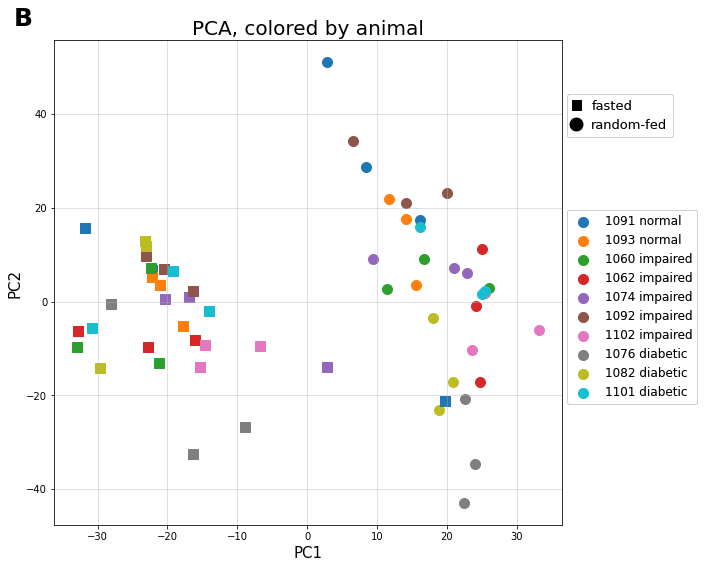

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA, colored by animal', fontsize = 20)
targets = ['RBG', 'FBG']
weeks = [8, 9, 10]
markers = ['o', 's']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
# colors = [plt.get_cmap('Dark2')(i) for i in range(1, 11)]

handles = []

for target, marker in zip(targets, markers):
    for label, color in zip(animals_used, colors):
        scatter_points = pca_data[(pca_data['bg_type'] == target) & \
                                  (pca_data['animal'] == label)]
#             print(scatter_points)
        handle = ax.scatter(scatter_points['pc1'],
                            scatter_points['pc2'],
                            c = color,
#                             cmap='viridis',
                            marker=marker,
                            s = (110 if marker == 's' else 100))

        # Annotate the plot with number for week 8, 9, 10 (convert to 1, 2, 3 for ease of reading)
#         for index, row in scatter_points.iterrows():
#             week = row['week'] - 7  # Minus 7 to go from week 8->1, 9->2, 10->3
#             ax.annotate(str(week), xy=(row['pc1']-0.5, row['pc2']-0.7), 
#                         fontsize=8, color='white', weight='bold')

        # define the text label for the data handle for the legend:
        gluc_tol = animal_phenotypes[animal_phenotypes['animal'] == label]['glucose_tolerance'].values[0]
        handle.set_label(str(label) + ' ' + gluc_tol)
        handles.append(handle)
        
# ax.legend(['RBG sample', 'FBG sample'],)
ax.grid(alpha=0.5)
plt.tight_layout()

legend_labels = []
for animal in animals_used:
    animal_data = animal_phenotypes[animal_phenotypes['animal'] == animal]
    gluc_tol = animal_data['glucose_tolerance'].values[0]
    label = str(animal) + ' ' + gluc_tol
    legend_labels.append(label)
    
# Sort legend_labels based on normal/impaired/diabetic substring
# legend_labels.sort(key = lambda x: x.split(' ')[1])

handles, labels = ax.get_legend_handles_labels()

# print(handles, labels)
# legend = ax.legend(handles, labels, loc=(1.01, 0.23))

legend = ax.legend(handles[:10], labels[:10], loc=(1.01, 0.25), fontsize=12)

# legend = ax.legend(labels=legend_labels, loc=(1.01, 0.7))

legend2 = ax.legend(handles=[mpatches.Rectangle(xy=(0, 0), width=1, height=1, color='black', label='fasted', ),
                             Line2D([0], [0], marker='o', color='white', label='random-fed', 
                                    markerfacecolor='black', markersize=15)], 
                    loc=(1.01, 0.8), 
                    fontsize=13, 
                    handlelength=0.7)
ax.add_artist(legend)
ax.add_artist(legend2)

# legend = ax.legend(labels=legend_labels, loc=(1.01, 0.7))
ax.add_artist(legend)
# ax.legend(handles=[mpatches.Rectangle(xy=(0, 0), width=1, height=1, color='black', label='FBG'),
#                    mpatches.Circle(xy=(0, 0), color='black', label='RBG')])

ax.text(-0.08, 1.03, "B", transform=ax.transAxes, fontsize=25, weight='bold')
# ax.text(1.072, 0.87, "Animal, feeding, glucose tolerance", transform=ax.transAxes, fontsize=9)

plt.tight_layout()

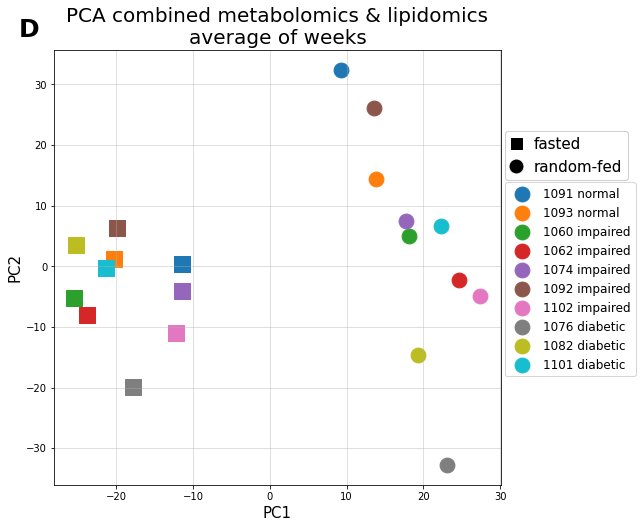

In [17]:
pc_to_plot_x = 1
pc_to_plot_y = 2

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC' + str(pc_to_plot_x), fontsize = 15)
ax.set_ylabel('PC' + str(pc_to_plot_y), fontsize = 15)
ax.set_title('PCA combined metabolomics & lipidomics\naverage of weeks', fontsize = 20)

markers = ['o', 's']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
# colors = [plt.get_cmap('Dark2')(i) for i in range(1, 11)]
handles = []
for rat_label, color in zip(animals_used, colors):
    for bg_type, marker in zip(['RBG', 'FBG'], markers):
        tolerance_type = animal_to_tolerance_dict[rat_label]
        edge_color = None
        if tolerance_type == 'diabetic':
            edge_color = 'lightgray'
        elif tolerance_type == 'impaired':
            edge_color = 'darkgray'
        else: 
            edge_color = 'black'

        scatter_points = pca_data[(pca_data['gluc_tol'] == tolerance_type) & \
                                  (pca_data['animal'] == (rat_label)) & \
                                  (pca_data['bg_type'] == bg_type)].mean(axis=0)
        handle = ax.scatter(scatter_points['pc' + str(pc_to_plot_x)],
                            scatter_points['pc' + str(pc_to_plot_y)],
                            c = color,
                            marker=marker,
#                             edgecolors=edge_color,
#                             linewidths=3,              # linewidths is stroke size of marker outline
                            s = (250 if marker == 's' else 220),
                            )
#         # Annotate the plot with letter for Diabetic, Normal, Impaired
#         ax.annotate(tolerance_type[0].upper(), 
#                     xy=(scatter_points['pc1']-0.5, scatter_points['pc2']-0.7), 
#                     fontsize=20,
#                     color='black')
        # define the text label for the data handle for the legend:
#         gluc_tol = animal_phenotypes[animal_phenotypes['animal'] == rat_label]['glucose_tolerance'].values[0]
        handle.set_label(str(rat_label) + ' ' + tolerance_type )
        handles.append(handle)
# ax.legend(['RBG sample', 'FBG sample'],)
ax.grid(alpha=0.5)
legend_labels = []
for animal in animals_used:
    animal_data = animal_phenotypes[animal_phenotypes['animal'] == animal]
    gluc_tol = animal_data['glucose_tolerance'].values[0]
    label = str(animal) + ' ' + gluc_tol
    legend_labels.append(label)
    
# Sort legend_labels based on normal/impaired/diabetic substring
# legend_labels.sort(key = lambda x: x.split(' ')[1])
handles, labels = ax.get_legend_handles_labels()
# print(handles, labels)
legend = ax.legend(handles[::2], labels[::2], loc=(1.01, 0.25), fontsize=12)
# legend = ax.legend(labels=legend_labels, loc=(1.01, 0.7))
legend2 = ax.legend(handles=[mpatches.Rectangle(xy=(0, 0), width=1, height=1, color='black', label='fasted', ),
                   Line2D([0], [0], marker='o', color='white', label='random-fed', 
                          markerfacecolor='black', markersize=15)], loc=(1.01, 0.7), fontsize=15, handlelength=0.7)
ax.add_artist(legend)
ax.add_artist(legend2)
# ax.legend(handles=[mpatches.Rectangle(xy=(0, 0), width=1, height=1, color='black', label='FBG'),
#                    mpatches.Circle(xy=(0, 0), color='black', label='RBG')], loc=(1.01, 0.98))
ax.text(-0.08, 1.03, "D", transform=ax.transAxes, fontsize=25, weight='bold')

# plt.tight_layout()
plt.savefig(r'..\reports\figures\3-5-1\multiomics_PCA_week_average.png', bbox_inches='tight')